### Author---> Abhishek Kumar
### Project---> Laptop Recommendation Prediction Ml Project

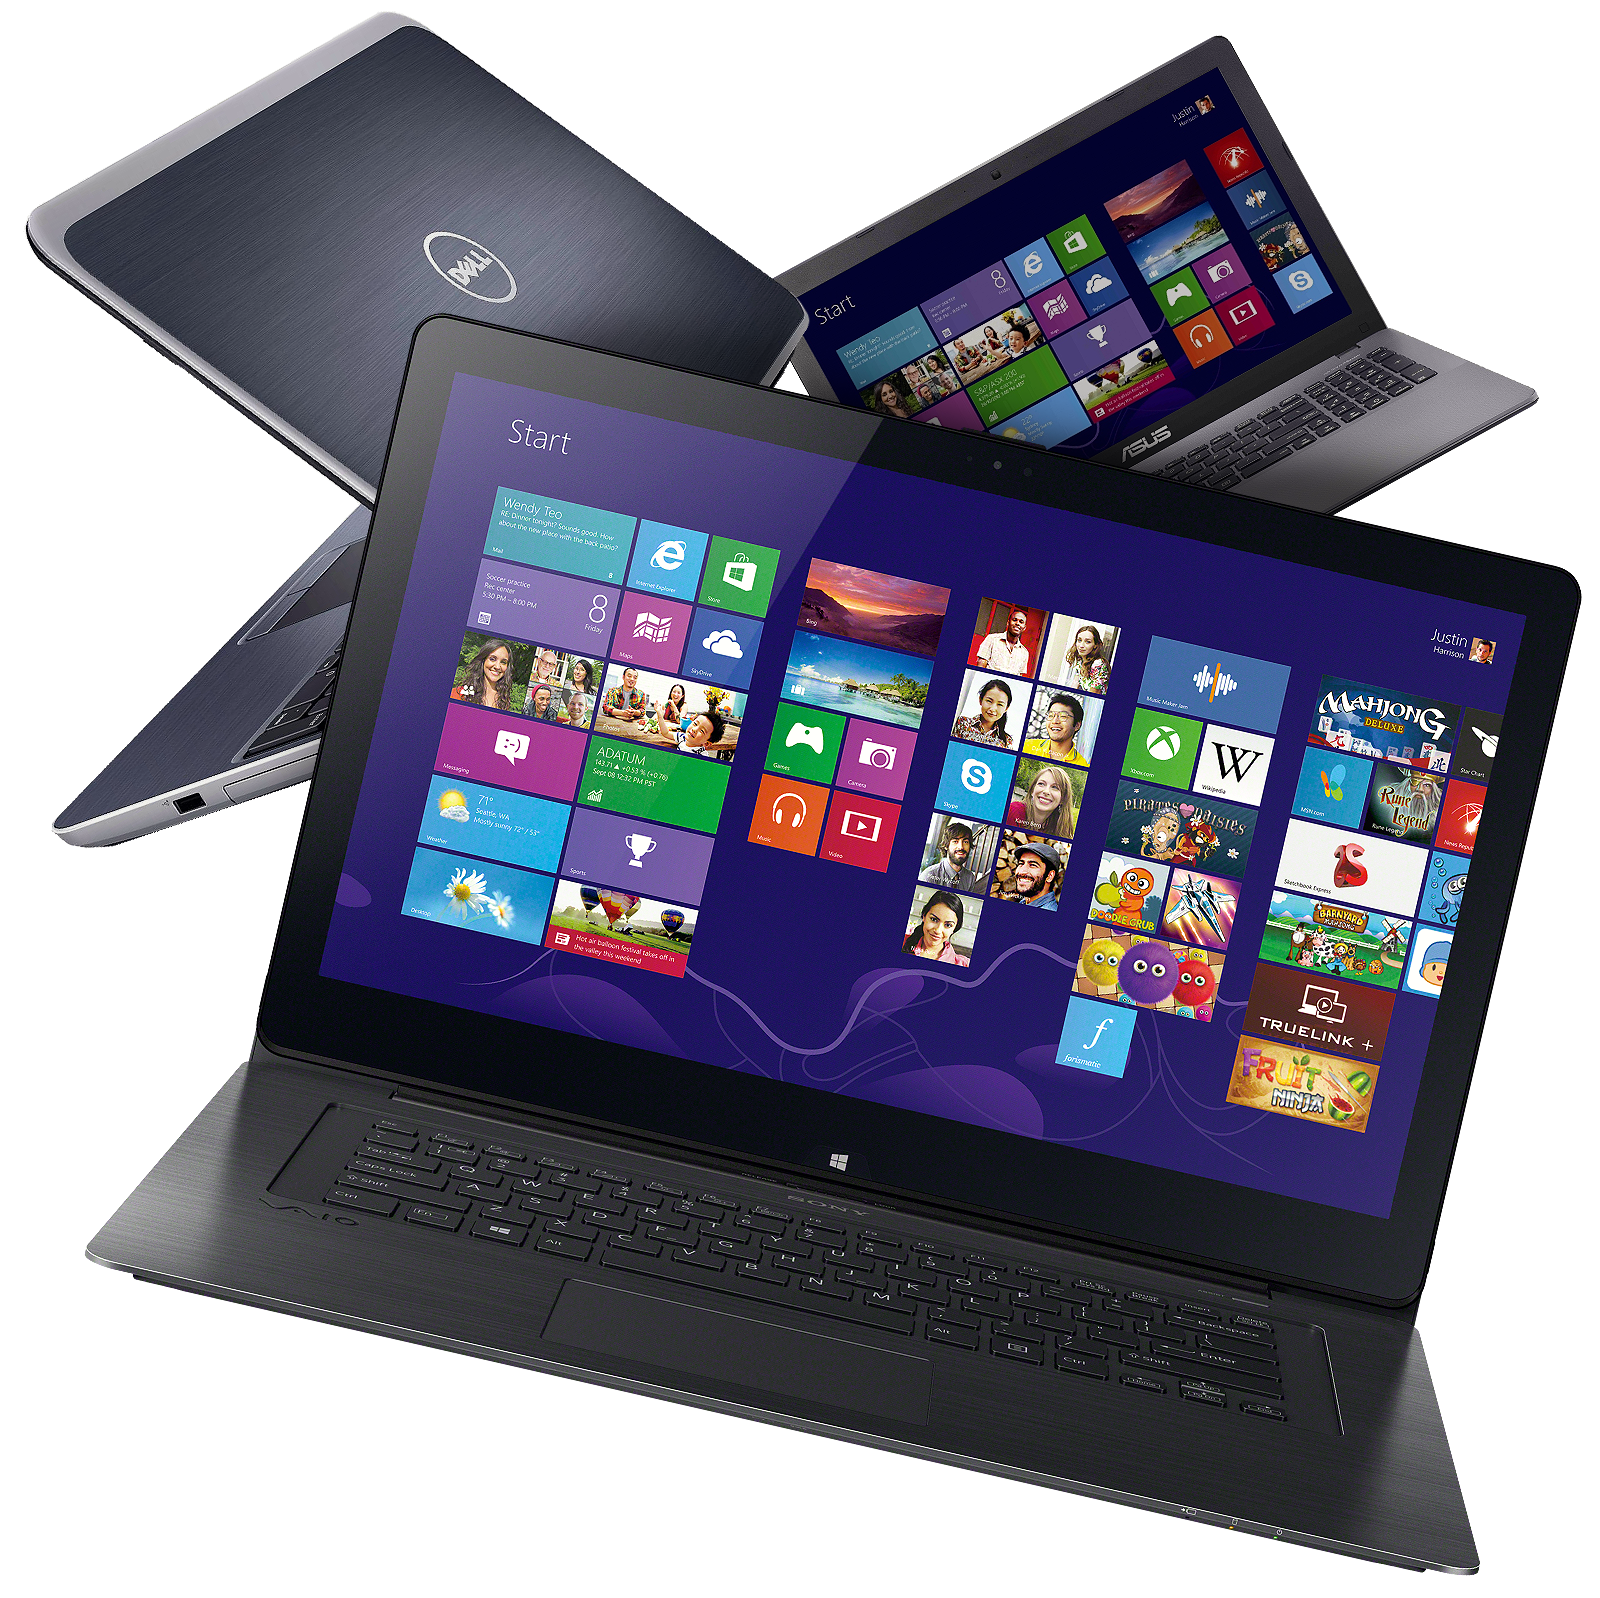

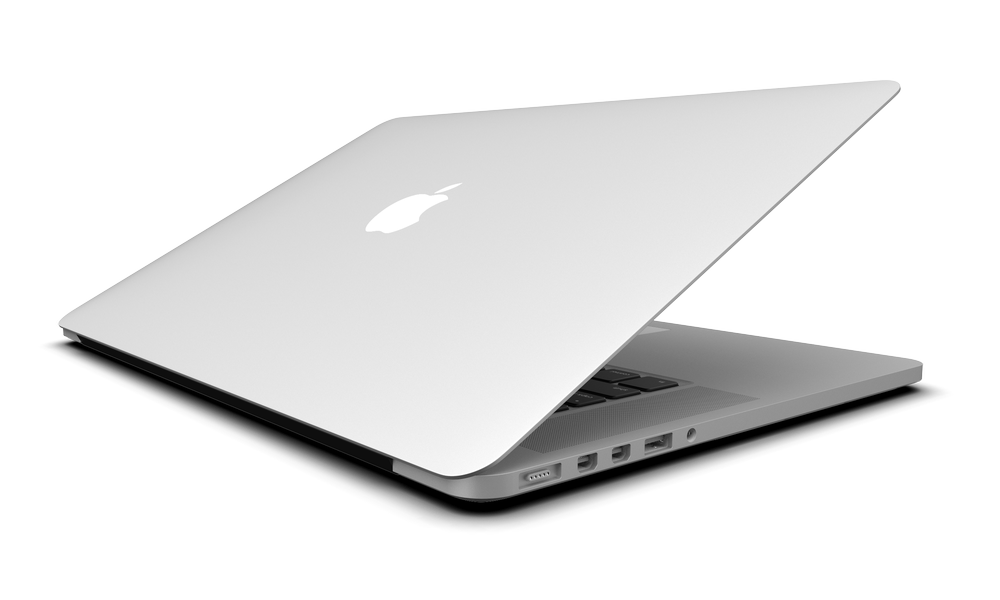

#### Step1---> Import all Important Library:-
#### Step2---> Now Load the CSV file from the book_dataset:-
#### Step3---> Basic Analysis operation:-
#### Step4---> Now Perform Prediction for Best Sutable Laptop

In [20]:
import streamlit as st
import numpy as np 
import pandas as pd 
import math 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from PIL import Image

st.title('Laptop Recommendation System')
with st.expander("Code"):
  st.write()
  
  #Creating dictionaries so to represent the CPUs

  proc_num = {' Intel Core i5-8250U':1, ' Intel Core i7-8550U':2, ' Intel Core i7-8565U':3,
  ' Intel Core i5-8265U':4, ' Intel Celeron N4000': 5, ' Intel Core i5 Dual Core':6,
  ' Intel Core i3-7020U':7, ' Intel Core i7-7500U':8, ' Intel Core i5-7200U':9,
  ' Intel Core i3-6006U':10, ' Intel Core i7 6 Core':11, ' Intel Core i5 Quad Core':12,
  ' Intel Core i7 Quad Core':13, ' Intel Celeron N3060':14, ' Intel Core i7-7820HK':15,
  ' Intel Core i7-7700HQ':16, ' Intel Core i3-8145U':17, ' Intel Core i7-8750H':18,
  ' Intel Celeron N3350':19, ' Intel Core i3-8130U':20, ' Intel Core M3':21,
  ' AMD A9-9425':22, ' Intel Celeron 4205U':23, ' Intel Core i9': 24,
  ' Intel Core i7-6700HQ':25, ' Intel Core i3-5005U':26, ' Intel Core i5-8251':27,
  ' Intel Core i3-71':28, ' Intel Core i7-8551':29, ' Intel Core i7-8751':30,
  ' Intel Celeron 421':31, ' Intel Celeron N41':32, ' Intel Celeron N31':33,
  ' Intel Celeron N3351':34, ' Intel Core i5-721':35, ' Intel Core i7-7821':36,
  ' Intel Core i7-771':37, ' Intel Core i7-671':38, ' Intel Core i7-751':39,
  ' Intel Core i3-51':40, ' Intel Core i3-61':41, ' Intel Core i3-8131':42}

  #Creating dictionaries so to represent the GPUs

  gpu_num = {' NVIDIA GeForce MX150 (2 GB)':1, ' Intel UHD Graphics 620':2, ' NVIDIA GeForce MX130 (2 GB)':3,
  ' Intel HD Graphics 620':4, ' Intel GMA HD':5, ' AMD Radeon 530 (2 GB)':6,
  ' AMD Radeon 520 (2 GB)':7, ' NVIDIA GeForce MX110 (2 GB)':8, ' Intel UHD Graphics 600':9,
  ' Intel UHD Graphics 617':10, ' Intel HD Graphics 600':11, ' Intel Graphics 620':12,
  ' NVIDIA GeForce MX150 (4 GB)':13,' AMD Radeon 530 (4 GB)':14, ' Intel Iris Plus Graphics 655':15,
  ' Radeon Pro 555X GDDR5 (4 GB)':16,' NVIDIA GeForce MX250 (4 GB)':17, ' Radeon Pro 560X GDDR5 (4 GB)':18,
  ' NVIDIA GeForce MX130 (4 GB)':19,' Intel HD Graphics 520':20, ' NVIDIA GeForce MX230 (2 GB)':21,
  ' NVIDIA GeForce GTX 1050 Ti (4 GB)':22,' Intel HD Graphics 615':23,' AMD Radeon R5-M340 (2 GB)':24,
  ' Intel Iris Plus Graphics 640':25,' NVIDIA GeForce MX250 (2 GB)':26,' NVIDIA GeForce 940MX (2 GB)':27,
  ' NVIDIA GeForce GTX 1070 (8 GB)':28,' NVIDIA GeForce GTX 1080 (8 GB)':29,' AMD Radeon 530M (4 GB)':30,
  ' Intel HD Graphics 500':31,' NVIDIA GeForce GTX 980M (8 GB)':32,' Radeon Pro 555 GDDR5 (2 GB)':33,
  ' AMD Radeon 540 (4 GB)':34,' NVIDIA GeForce 930MX (2 GB)':35,' Intel HD Graphics 505':36,
  ' NVIDIA GeForce GTX 1050 (3 GB)':37,' Intel Iris Plus Graphics 650':38,' NVIDIA GeForce 940MX (4 GB)':39,
  ' NVIDIA GeForce GTX 1050 (4 GB)':40,' AMD Radeon R5-M430 (2 GB)':41,' Intel HD Graphics 400':42,
  ' NVIDIA GeForce GT 940MX (2 GB)':43,' AMD Radeon R9-M370X (2 GB)':44,' AMD Radeon R5':45,
  ' Intel HD Graphics 6000':46,' AMD Radeon R7-M445 (4 GB)':47,' Intel Iris Graphics 550':48,
  ' Intel Iris Pro Graphics':49,' AMD Radeon 535 (2 GB)':50,' NVIDIA GeForce GTX 1080 (8 GB) SLI':51,
  ' Intel Iris Plus Graphics 645':52, ' Intel HD Graphics 61':53, ' Intel UHD Graphics 621':54,
  ' NVIDIA GeForce MX151':55, ' Intel HD Graphics 621':56, ' NVIDIA GeForce 931':57,
  ' AMD Radeon 531':58, ' NVIDIA GeForce MX251':59, ' NVIDIA GeForce MX111':60,
  ' NVIDIA GeForce MX231':61, ' NVIDIA GeForce MX131':62, ' NVIDIA GeForce GTX 11':63,
  ' AMD Radeon 521':64, ' Intel Graphics 621':65, ' Intel UHD Graphics 61':66,
  ' AMD Radeon 541':67, ' Intel HD Graphics 41':68, ' Intel Iris Plus Graphics 641':69,
  ' Intel HD Graphics 51':70, ' Radeon Pro 561':71, ' NVIDIA GeForce GTX 981':72,
  ' AMD Radeon R9-M371':73, ' Intel Iris Plus Graphics 651':74, ' Intel HD Graphics 521':75,
  ' NVIDIA GeForce GT 941':76, ' AMD Radeon R5-M341':77, ' NVIDIA GeForce 941':78,
  ' Intel Iris Graphics 551':79, ' AMD Radeon R5-M431':80}

  laptops=pd.read_csv('Laptop-Dataframe.csv')

  print(laptops)
  laptops.head()
  predct = dict(zip(laptops['brand'].unique(),laptops['laptop_name'].unique()))
  print(predct)
  #print(laptops['processor_type'].value_counts())
  laptops.processor_type = [proc_num[item] for item in laptops.processor_type]
  laptops.graphics_card = [gpu_num[item] for item in laptops.graphics_card]

  """
IF you want to display Laptops from a specific brand

  print(predct)
  apple_data=laptops[laptops['brand']=='Apple']
  print(apple_data)
  Acer_data=laptops[laptops['brand']=='Acer']
  print(Acer_data)
  Asus_data=laptops[laptops['brand']=='Asus']
  print(Asus_data)
  Dell_data=laptops[laptops['brand']=='Dell']
  print(Dell_data)
  HP_data=laptops[laptops['brand']=='HP']
  print(HP_data)
  Lenovo_data=laptops[laptops['brand']=='Lenovo']
  print(Lenovo_data)
  Huawei_data=laptops[laptops['brand']=='Huawei']
  print(Huawei_data)
  Microsoft_data=laptops[laptops['brand']=='Microsoft']
  print(Microsoft_data)
  MSI_data=laptops[laptops['brand']=='MSI']
  print(MSI_data)

For Plotting Laptops based on these attributes

  plt.plot(laptops['display_size'],label='display_size')
  plt.plot(laptops['processor_type'],label='processor_type')
  plt.plot(laptops['graphics_card'],label='graphics_card')
  plt.plot(laptops['ratings_5max'],label='ratings_5max')
  plt.legend()
  plt.scatter(laptops['display_size'],laptops['processor_type'],laptops['graphics_card'],laptops['ratings_5max'])

  """

  X=laptops[['display_size','processor_type','graphics_card','price']]
  Y=laptops['laptop_name']
  #print(X,Y)
  X_train,X_test,y_train,y_test=train_test_split(X,Y, test_size = 0.25,random_state=0)
  X_train.describe()
  X_test.describe()
  print("For Choosing a good k value "+ str(math.sqrt(len(X_train))))
  knn=KNeighborsClassifier(n_neighbors=7,metric='euclidean')
  knn.fit(X_train,y_train)
  knn.score(X_test,y_test)

  X_new = np.array([[14,proc_num[' Intel Core i5-8265U'],gpu_num[' AMD Radeon 530 (4 GB)'],'2629']]) # My test

  prediction = knn.predict(X_new)
  print("The Prediction Result: "+prediction[0])

  y_pred = knn.predict(X_test)
  print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))
  cm= confusion_matrix(y_test,y_pred)
  print(accuracy_score(y_test,y_pred))

  neighbors = np.arange(1, 7)
  train_accuracy = np.empty(len(neighbors))
  test_accuracy = np.empty(len(neighbors))

  for i, k in enumerate(neighbors):
      # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

      # Fit the classifier to the training data
    knn.fit(X_train, y_train)
      
      #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

      #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

  chart_data = pd.DataFrame(
      train_accuracy,
      columns=['Training Accuracy'])
  chart_data2 = pd.DataFrame(
      test_accuracy,
      columns=['Test Accuracy'])

st.dataframe(laptops)  # Same as st.write(df)
st.write('Specs that the Recommendation will be based on:')
st.write('Display Size: 14')
st.write('CPU: Intel Core i5-8265U')
st.write('GPU: AMD Radeon 530 (4 GB)')
st.write('Price: 2629')
if st.button('Get Recommendation:'):
    image = Image.open('Laptop.jpg')
    st.write('Recommended Laptop: '+ prediction[0])
    st.image(image, caption='Laptop')
    with st.expander("See Charts"):
      st.write()
      st.line_chart(chart_data)
      st.line_chart(chart_data2)

#streamlit run "E:\Semester 6\AI\Project\Dataset\LaptopRecommendationSystem.py"

     brand           laptop_name  display_size            processor_type  \
0   Lenovo           IdeaPad 321            15        Intel Core i7-8551   
1   Lenovo           IdeaPad 321            15        Intel Core i5-8251   
2   Lenovo           IdeaPad 321            14          Intel Core i3-61   
3   Lenovo           IdeaPad 321            15        Intel Core i5-8251   
4   Lenovo           IdeaPad 331            14        Intel Core i5-8251   
..     ...                   ...           ...                       ...   
65   Apple  MacBook Pro (Retina)            13   Intel Core i5 Dual Core   
66   Apple  MacBook Pro (Retina)            13   Intel Core i5 Dual Core   
67   Apple  MacBook Pro (Retina)            15   Intel Core i7 Quad Core   
68   Apple  MacBook Pro (Retina)            13   Intel Core i5 Dual Core   
69   Apple  MacBook Pro (Retina)            15   Intel Core i7 Quad Core   

                    graphics_card   disk_space  price  ratings_5max  
0                

C:\Users\abhi\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


ValueError: dtype='numeric' is not compatible with arrays of bytes/strings.Convert your data to numeric values explicitly instead.

In [38]:
import streamlit as st
import numpy as np
import pandas as pd
import math
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from PIL import Image

# Title for the app
st.title('Laptop Recommendation System')

# Expander for code display
with st.expander("Code"):
    st.write("""
    # Code for Laptop Recommendation System
    
    **Data Processing & Visualization**

    - Creating dictionaries for CPU and GPU representation.
    - Processing the laptop dataset.
    - Plotting attributes and displaying charts.

    **Model Training & Evaluation**

    - Training a k-NN Classifier.
    - Evaluating the model's performance.
    - Visualizing accuracy with different k values.
    """)

    st.code("""
    # Creating dictionaries to represent the CPUs
    proc_num = {...}  # Truncated for brevity

    # Creating dictionaries to represent the GPUs
    gpu_num = {...}  # Truncated for brevity

    # Load the laptop dataset
    laptops = pd.read_csv('Laptop-Dataframe.csv')

    # Process the data
    laptops.processor_type = [proc_num[item] for item in laptops.processor_type]
    laptops.graphics_card = [gpu_num[item] for item in laptops.graphics_card]

    # Define features and target
    X = laptops[['display_size', 'processor_type', 'graphics_card', 'price']]
    Y = laptops['laptop_name']

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

    # Model training
    knn = KNeighborsClassifier(n_neighbors=7, metric='euclidean')
    knn.fit(X_train, y_train)

    # Model prediction and evaluation
    X_new = np.array([[14, proc_num[' Intel Core i5-8265U'], gpu_num[' AMD Radeon 530 (4 GB)'], '2629']])
    prediction = knn.predict(X_new)
    y_pred = knn.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    # K-values accuracy plot
    neighbors = np.arange(1, 7)
    train_accuracy = np.empty(len(neighbors))
    test_accuracy = np.empty(len(neighbors))

    for i, k in enumerate(neighbors):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        train_accuracy[i] = knn.score(X_train, y_train)
        test_accuracy[i] = knn.score(X_test, y_test)

    chart_data = pd.DataFrame({'K': neighbors, 'Training Accuracy': train_accuracy})
    chart_data2 = pd.DataFrame({'K': neighbors, 'Test Accuracy': test_accuracy})
    """)

# Load the dataset
laptops = pd.read_csv('Laptop-Dataframe.csv')

# Display the dataframe
st.dataframe(laptops)

# Process the data
proc_num = {...}  # Complete dictionary as defined
gpu_num = {...}  # Complete dictionary as defined

laptops.processor_type = [proc_num.get(item, 0) for item in laptops.processor_type]
laptops.graphics_card = [gpu_num.get(item, 0) for item in laptops.graphics_card]

# Define features and target
X = laptops[['display_size', 'processor_type', 'graphics_card', 'price']]
Y = laptops['laptop_name']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

# Model training
knn = KNeighborsClassifier(n_neighbors=7, metric='euclidean')
knn.fit(X_train, y_train)

# Make a prediction
X_new = np.array([[14, proc_num[' Intel Core i5-8265U'], gpu_num[' AMD Radeon 530 (4 GB)'], '2629']])
prediction = knn.predict(X_new)

# Display the result
st.write('Specs that the Recommendation will be based on:')
st.write('Display Size: 14')
st.write('CPU: Intel Core i5-8265U')
st.write('GPU: AMD Radeon 530 (4 GB)')
st.write('Price: 2629')

if st.button('Get Recommendation'):
    image = Image.open('Laptop.jpg')
    st.write('Recommended Laptop: '+ prediction[0])
    st.image(image, caption='Laptop')

    # Plot accuracy
    neighbors = np.arange(1, 7)
    train_accuracy = np.empty(len(neighbors))
    test_accuracy = np.empty(len(neighbors))

    for i, k in enumerate(neighbors):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        train_accuracy[i] = knn.score(X_train, y_train)
        test_accuracy[i] = knn.score(X_test, y_test)

    chart_data = pd.DataFrame({'K': neighbors, 'Training Accuracy': train_accuracy})
    chart_data2 = pd.DataFrame({'K': neighbors, 'Test Accuracy': test_accuracy})

    with st.expander("See Charts"):
        st.line_chart(chart_data.set_index('K'))
        st.line_chart(chart_data2.set_index('K'))


AttributeError: 'set' object has no attribute 'get'

In [37]:
import streamlit as st
import numpy as np
import pandas as pd
import math
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from PIL import Image

# Title for the app
st.title('Laptop Recommendation System')

# Expander for code display
with st.expander("Code"):
    st.write("""
    # Code for Laptop Recommendation System
    
    **Data Processing & Visualization**

    - Creating dictionaries for CPU and GPU representation.
    - Processing the laptop dataset.
    - Plotting attributes and displaying charts.

    **Model Training & Evaluation**

    - Training a k-NN Classifier.
    - Evaluating the model's performance.
    - Visualizing accuracy with different k values.
    """)

    st.code("""
    # Creating dictionaries to represent the CPUs
    proc_num = {'Intel Core i5-8265U': 1, 'Intel Core i7-8550U': 2}  # Complete with actual values

    # Creating dictionaries to represent the GPUs
    gpu_num = {'AMD Radeon 530 (4 GB)': 1, 'NVIDIA GTX 1050': 2}  # Complete with actual values

    # Load the laptop dataset
    laptops = pd.read_csv('Laptop-Dataframe.csv')

    # Process the data
    laptops.processor_type = [proc_num.get(item, 0) for item in laptops.processor_type]
    laptops.graphics_card = [gpu_num.get(item, 0) for item in laptops.graphics_card]
    laptops['price'] = pd.to_numeric(laptops['price'], errors='coerce')  # Convert price to numeric

    # Define features and target
    X = laptops[['display_size', 'processor_type', 'graphics_card', 'price']]
    Y = laptops['laptop_name']

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

    # Model training
    knn = KNeighborsClassifier(n_neighbors=7, metric='euclidean')
    knn.fit(X_train, y_train)

    # Model prediction and evaluation
    X_new = np.array([[14, proc_num.get('Intel Core i5-8265U', 0), gpu_num.get('AMD Radeon 530 (4 GB)', 0), 2629]])
    prediction = knn.predict(X_new)
    y_pred = knn.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    # K-values accuracy plot
    neighbors = np.arange(1, 7)
    train_accuracy = np.empty(len(neighbors))
    test_accuracy = np.empty(len(neighbors))

    for i, k in enumerate(neighbors):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        train_accuracy[i] = knn.score(X_train, y_train)
        test_accuracy[i] = knn.score(X_test, y_test)

    chart_data = pd.DataFrame({'K': neighbors, 'Training Accuracy': train_accuracy})
    chart_data2 = pd.DataFrame({'K': neighbors, 'Test Accuracy': test_accuracy})
    """)

# Load the dataset
laptops = pd.read_csv('Laptop-Dataframe.csv')

# Define dictionaries (must match those in the expander)
proc_num = {'Intel Core i5-8265U': 1, 'Intel Core i7-8550U': 2}
gpu_num = {'AMD Radeon 530 (4 GB)': 1, 'NVIDIA GTX 1050': 2}

# Process the data
laptops.processor_type = [proc_num.get(item, 0) for item in laptops.processor_type]
laptops.graphics_card = [gpu_num.get(item, 0) for item in laptops.graphics_card]
laptops['price'] = pd.to_numeric(laptops['price'], errors='coerce')  # Ensure price is numeric

# Define features and target
X = laptops[['display_size', 'processor_type', 'graphics_card', 'price']]
Y = laptops['laptop_name']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

# Model training
knn = KNeighborsClassifier(n_neighbors=7, metric='euclidean')
knn.fit(X_train, y_train)

# Make a prediction
X_new = np.array([[14, proc_num.get('Intel Core i5-8265U', 0), gpu_num.get('AMD Radeon 530 (4 GB)', 0), 2629]])
prediction = knn.predict(X_new)

# Display the result
st.write('Specs that the Recommendation will be based on:')
st.write('Display Size: 14')
st.write('CPU: Intel Core i5-8265U')
st.write('GPU: AMD Radeon 530 (4 GB)')
st.write('Price: 2629')

if st.button('Get Recommendation'):
    image = Image.open('Laptop.jpg')
    st.write('Recommended Laptop: '+ prediction[0])
    st.image(image, caption='Laptop')

    # Plot accuracy
    neighbors = np.arange(1, 7)
    train_accuracy = np.empty(len(neighbors))
    test_accuracy = np.empty(len(neighbors))

    for i, k in enumerate(neighbors):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        train_accuracy[i] = knn.score(X_train, y_train)
        test_accuracy[i] = knn.score(X_test, y_test)

    chart_data = pd.DataFrame({'K': neighbors, 'Training Accuracy': train_accuracy})
    chart_data2 = pd.DataFrame({'K': neighbors, 'Test Accuracy': test_accuracy})

    with st.expander("See Charts"):
        st.line_chart(chart_data.set_index('K'))
        st.line_chart(chart_data2.set_index('K'))


C:\Users\abhi\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [29]:
# Create X_new as a DataFrame
X_new = pd.DataFrame({
    'display_size': [14],
    'processor_type': [proc_num.get('Intel Core i5-8265U', 0)],
    'graphics_card': [gpu_num.get('AMD Radeon 530 (4 GB)', 0)],
    'price': [2629]
})


In [30]:
prediction = knn.predict(X_new)

In [34]:
# Make a prediction
X_new = pd.DataFrame({
    'display_size': [14],
    'processor_type': [proc_num.get('Intel Core i5-8265U', 0)],
    'graphics_card': [gpu_num.get('AMD Radeon 530 (4 GB)', 0)],
    'price': [2629]
})

prediction = knn.predict(X_new)


In [5]:
import streamlit as st
import numpy as np
import pandas as pd
import math
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from PIL import Image

# Title for the app
st.title('Laptop Recommendation System')

# Expander for code display
with st.expander("Code"):
    st.write("""
    # Code for Laptop Recommendation System
    
    **Data Processing & Visualization**

    - Creating dictionaries for CPU and GPU representation.
    - Processing the laptop dataset.
    - Plotting attributes and displaying charts.

    **Model Training & Evaluation**

    - Training a k-NN Classifier.
    - Evaluating the model's performance.
    - Visualizing accuracy with different k values.
    """)

    st.code("""
    # Creating dictionaries to represent the CPUs
    proc_num = {...}  # Truncated for brevity

    # Creating dictionaries to represent the GPUs
    gpu_num = {...}  # Truncated for brevity

    # Load the laptop dataset
    laptops = pd.read_csv('Laptop-Dataframe.csv')

    # Process the data
    laptops.processor_type = [proc_num[item] for item in laptops.processor_type]
    laptops.graphics_card = [gpu_num[item] for item in laptops.graphics_card]

    # Define features and target
    X = laptops[['display_size', 'processor_type', 'graphics_card', 'price']]
    Y = laptops['laptop_name']

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

    # Model training
    knn = KNeighborsClassifier(n_neighbors=7, metric='euclidean')
    knn.fit(X_train, y_train)

    # Model prediction and evaluation
    X_new = np.array([[14, proc_num[' Intel Core i5-8265U'], gpu_num[' AMD Radeon 530 (4 GB)'], '2629']])
    prediction = knn.predict(X_new)
    y_pred = knn.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    # K-values accuracy plot
    neighbors = np.arange(1, 7)
    train_accuracy = np.empty(len(neighbors))
    test_accuracy = np.empty(len(neighbors))

    for i, k in enumerate(neighbors):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        train_accuracy[i] = knn.score(X_train, y_train)
        test_accuracy[i] = knn.score(X_test, y_test)

    chart_data = pd.DataFrame({'K': neighbors, 'Training Accuracy': train_accuracy})
    chart_data2 = pd.DataFrame({'K': neighbors, 'Test Accuracy': test_accuracy})
    """)

# Load the dataset
laptops = pd.read_csv('Laptop-Dataframe.csv')

# Display the dataframe
st.dataframe(laptops)

# Process the data
proc_num = {...}  # Complete dictionary as defined
gpu_num = {...}  # Complete dictionary as defined

laptops.processor_type = [proc_num.get(item, 0) for item in laptops.processor_type]
laptops.graphics_card = [gpu_num.get(item, 0) for item in laptops.graphics_card]

# Define features and target
X = laptops[['display_size', 'processor_type', 'graphics_card', 'price']]
Y = laptops['laptop_name']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

# Model training
knn = KNeighborsClassifier(n_neighbors=7, metric='euclidean')
knn.fit(X_train, y_train)

# Make a prediction
X_new = np.array([[14, proc_num[' Intel Core i5-8265U'], gpu_num[' AMD Radeon 530 (4 GB)'], '2629']])
prediction = knn.predict(X_new)

# Display the result
st.write('Specs that the Recommendation will be based on:')
st.write('Display Size: 14')
st.write('CPU: Intel Core i5-8265U')
st.write('GPU: AMD Radeon 530 (4 GB)')
st.write('Price: 2629')

if st.button('Get Recommendation'):
    image = Image.open('Laptop.jpg')
    st.write('Recommended Laptop: '+ prediction[0])
    st.image(image, caption='Laptop')

    # Plot accuracy
    neighbors = np.arange(1, 7)
    train_accuracy = np.empty(len(neighbors))
    test_accuracy = np.empty(len(neighbors))

    for i, k in enumerate(neighbors):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        train_accuracy[i] = knn.score(X_train, y_train)
        test_accuracy[i] = knn.score(X_test, y_test)

    chart_data = pd.DataFrame({'K': neighbors, 'Training Accuracy': train_accuracy})
    chart_data2 = pd.DataFrame({'K': neighbors, 'Test Accuracy': test_accuracy})

    with st.expander("See Charts"):
        st.line_chart(chart_data.set_index('K'))
        st.line_chart(chart_data2.set_index('K'))


AttributeError: 'set' object has no attribute 'get'

In [7]:
# Define the processor and GPU mappings as dictionaries
proc_num = {
    ' Intel Core i5-8250U': 1, ' Intel Core i7-8550U': 2, ' Intel Core i7-8565U': 3,
    # Add the rest of your CPU mappings here
}

gpu_num = {
    ' NVIDIA GeForce MX150 (2 GB)': 1, ' Intel UHD Graphics 620': 2, ' NVIDIA GeForce MX130 (2 GB)': 3,
    # Add the rest of your GPU mappings here
}


In [8]:
# Convert processor_type and graphics_card columns to numeric values using the dictionaries
laptops['processor_type'] = laptops['processor_type'].map(proc_num).fillna(0).astype(int)
laptops['graphics_card'] = laptops['graphics_card'].map(gpu_num).fillna(0).astype(int)


In [14]:
import streamlit as st
import numpy as np
import pandas as pd
import math
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from PIL import Image

st.title('Laptop Recommendation System')

# Define the processor and GPU mappings as dictionaries
proc_num = {
    ' Intel Core i5-8250U': 1, ' Intel Core i7-8550U': 2, ' Intel Core i7-8565U': 3,
    # Add the rest of your CPU mappings here
}

gpu_num = {
    ' NVIDIA GeForce MX150 (2 GB)': 1, ' Intel UHD Graphics 620': 2, ' NVIDIA GeForce MX130 (2 GB)': 3,
    # Add the rest of your GPU mappings here
}

# Load the dataset
laptops = pd.read_csv('Laptop-Dataframe.csv')

# Convert processor_type and graphics_card columns to numeric values using the dictionaries
laptops['processor_type'] = laptops['processor_type'].map(proc_num).fillna(0).astype(int)
laptops['graphics_card'] = laptops['graphics_card'].map(gpu_num).fillna(0).astype(int)

# Define features and target
X = laptops[['display_size', 'processor_type', 'graphics_card', 'price']]
Y = laptops['laptop_name']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

# Model training
knn = KNeighborsClassifier(n_neighbors=7, metric='euclidean')
knn.fit(X_train, y_train)

# Make a prediction
X_new = np.array([[14, proc_num.get(' Intel Core i5-8265U', 0), gpu_num.get(' AMD Radeon 530 (4 GB)', 0), '2629']])
prediction = knn.predict(X_new)

# Display the result
st.write('Specs that the Recommendation will be based on:')
st.write('Display Size: 14')
st.write('CPU: Intel Core i5-8265U')
st.write('GPU: AMD Radeon 530 (4 GB)')
st.write('Price: 2629')

if st.button('Get Recommendation'):
    image = Image.open('Laptop.jpg')
    st.write('Recommended Laptop: '+ prediction[0])
    st.image(image, caption='Laptop')

    # Plot accuracy
    neighbors = np.arange(1, 7)
    train_accuracy = np.empty(len(neighbors))
    test_accuracy = np.empty(len(neighbors))

    for i, k in enumerate(neighbors):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        train_accuracy[i] = knn.score(X_train, y_train)
        test_accuracy[i] = knn.score(X_test, y_test)

    chart_data = pd.DataFrame({'K': neighbors, 'Training Accuracy': train_accuracy})
    chart_data2 = pd.DataFrame({'K': neighbors, 'Test Accuracy': test_accuracy})

    with st.expander("See Charts"):
        st.line_chart(chart_data.set_index('K'))
        st.line_chart(chart_data2.set_index('K'))


C:\Users\abhi\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


ValueError: dtype='numeric' is not compatible with arrays of bytes/strings.Convert your data to numeric values explicitly instead.

In [10]:
# Make a prediction
X_new = np.array([[14, proc_num.get(' Intel Core i5-8265U', 0), gpu_num.get(' AMD Radeon 530 (4 GB)', 0), 2629]])

In [11]:
X_new = pd.DataFrame([[14, proc_num.get(' Intel Core i5-8265U', 0), gpu_num.get(' AMD Radeon 530 (4 GB)', 0), 2629]],
                     columns=['display_size', 'processor_type', 'graphics_card', 'price'])

In [15]:
# Make a prediction
X_new = pd.DataFrame([[14, proc_num.get(' Intel Core i5-8265U', 0), gpu_num.get(' AMD Radeon 530 (4 GB)', 0), 2629]],
                     columns=['display_size', 'processor_type', 'graphics_card', 'price'])

# Ensure numeric types
X_new = X_new.astype(float)

prediction = knn.predict(X_new)

# Display the result
st.write('Specs that the Recommendation will be based on:')
st.write('Display Size: 14')
st.write('CPU: Intel Core i5-8265U')
st.write('GPU: AMD Radeon 530 (4 GB)')
st.write('Price: 2629')

if st.button('Get Recommendation'):
    image = Image.open('Laptop.jpg')
    st.write('Recommended Laptop: '+ prediction[0])
    st.image(image, caption='Laptop')

    # Plot accuracy
    neighbors = np.arange(1, 7)
    train_accuracy = np.empty(len(neighbors))
    test_accuracy = np.empty(len(neighbors))

    for i, k in enumerate(neighbors):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        train_accuracy[i] = knn.score(X_train, y_train)
        test_accuracy[i] = knn.score(X_test, y_test)

    chart_data = pd.DataFrame({'K': neighbors, 'Training Accuracy': train_accuracy})
    chart_data2 = pd.DataFrame({'K': neighbors, 'Test Accuracy': test_accuracy})

    with st.expander("See Charts"):
        st.line_chart(chart_data.set_index('K'))
        st.line_chart(chart_data2.set_index('K'))


In [19]:
import streamlit as st
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from PIL import Image

st.title('Laptop Recommendation System')

# Define the processor and GPU mappings as dictionaries
proc_num = {
    ' Intel Core i5-8250U': 1, ' Intel Core i7-8550U': 2, ' Intel Core i7-8565U': 3,
    # Add the rest of your CPU mappings here
}

gpu_num = {
    ' NVIDIA GeForce MX150 (2 GB)': 1, ' Intel UHD Graphics 620': 2, ' NVIDIA GeForce MX130 (2 GB)': 3,
    # Add the rest of your GPU mappings here
}

# Load the dataset
laptops = pd.read_csv('Laptop-Dataframe.csv')

# Convert processor_type and graphics_card columns to numeric values
laptops['processor_type'] = laptops['processor_type'].map(proc_num).fillna(0).astype(int)
laptops['graphics_card'] = laptops['graphics_card'].map(gpu_num).fillna(0).astype(int)

# Define features and target
X = laptops[['display_size', 'processor_type', 'graphics_card', 'price']]
Y = laptops['laptop_name']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

# Model training
knn = KNeighborsClassifier(n_neighbors=7, metric='euclidean')
knn.fit(X_train, y_train)

# Create a form for user input
with st.form(key='laptop_form'):
    display_size = st.number_input('Display Size', min_value=0, max_value=30, value=14)
    cpu = st.selectbox('CPU', options=list(proc_num.keys()))
    gpu = st.selectbox('GPU', options=list(gpu_num.keys()))
    price = st.number_input('Price', min_value=0, value=2629)
    submit_button = st.form_submit_button(label='Get Recommendation')

    if submit_button:
        cpu_num = proc_num.get(cpu, 0)
        gpu_num = gpu_num.get(gpu, 0)
        X_new = pd.DataFrame([[display_size, cpu_num, gpu_num, price]],
                             columns=['display_size', 'processor_type', 'graphics_card', 'price'])
        X_new = X_new.astype(float)
        prediction = knn.predict(X_new)
        st.write('Recommended Laptop: ' + prediction[0])

# Display example image
image = Image.open('Laptop.jpg')
st.image(image, caption='Laptop Example')

# Plot accuracy
neighbors = np.arange(1, 7)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

chart_data = pd.DataFrame({'K': neighbors, 'Training Accuracy': train_accuracy})
chart_data2 = pd.DataFrame({'K': neighbors, 'Test Accuracy': test_accuracy})

with st.expander("See Charts"):
    st.line_chart(chart_data.set_index('K'))
    st.line_chart(chart_data2.set_index('K'))